### Adv. Hydrology Project:
---

#### What are the impacts of different combinations of albedo parameterization methods, parameters, and incoming radiation data on modeling temporal snow patterns?

SUMMA model sensitivity analysis with:
* Albedo (parameterization methods vs parameter values)
* Forcing data (CUES vs CERES)

Evaluation variables:
* April 1st SWE
* Peak SWE accumulation
* Snow disappearance date
* Snow surface temperature (mean diurnal cycle per week/month?)
***

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysumma as ps
import copy
import os.path
import xarray as xr
import pandas as pd
from datetime import datetime

In [4]:
summa_executable = 'summa.exe'
# file manager for CUES model runs
case_path = '/home/jovyan/cues'
filemanager_path = os.path.join(case_path, 'summa_setup/file_manager.txt')

In [5]:
# Default simulation
S = ps.Simulation(executable='summa.exe', filemanager=filemanager_path)
S.start(run_option='local', run_suffix='default')
S.monitor()

False

In [6]:
# Look at default output
S.output

<xarray.Dataset>
Dimensions:                    (gru: 1, hru: 1, time: 59928)
Coordinates:
  * time                       (time) datetime64[ns] 2010-10-01 ... 2017-08-01T23:00:00.000013312
  * hru                        (hru) int32 1
Dimensions without coordinates: gru
Data variables:
    pptrate                    (time, hru) float64 ...
    airtemp                    (time, hru) float64 ...
    SWRadAtm                   (time, hru) float64 ...
    LWRadAtm                   (time, hru) float64 ...
    hruId                      (hru) int32 ...
    averageInstantRunoff       (time, gru) float64 ...
    averageRoutedRunoff        (time, gru) float64 ...
    nSnow                      (time, hru) int32 ...
    nSoil                      (time, hru) int32 ...
    nLayers                    (time, hru) int32 ...
    scalarCanopyIce            (time, hru) float64 ...
    scalarCanopyLiq            (time, hru) float64 ...
    scalarCanairTemp           (time, hru) float64 ...
    scalarCan

/srv/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


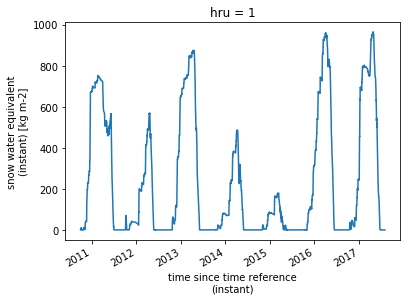

In [7]:
# Look at default output, plot SWE
S.output.scalarSWE.plot()

In [114]:
cues_data = pd.read_csv('/home/jovyan/cues_obs/cues2011to2017_Radiation_Albedo_WindSpeed_GroundTemp_AirTemp_RH_AirPressure_SnowDepth_SWE.csv')
cues_data.DateTime = pd.to_datetime(cues_data.DateTime, format='%m/%d/%y %H:%M')
cues_data['SWE_mm'] = cues_data.SWE_cm * 10

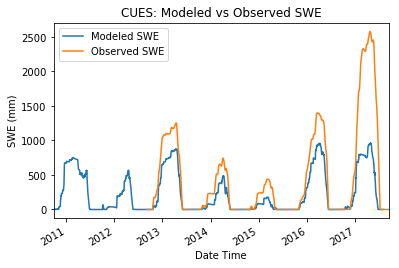

In [118]:
fig,ax = plt.subplots()
S.output.scalarSWE.plot(ax=ax, label='Modeled SWE')
cues_data.set_index('DateTime').SWE_mm.plot(ax=ax,label='Observed SWE')
ax.set_ylabel('SWE (mm)')
ax.set_xlabel('Date Time')
ax.set_title('CUES: Modeled vs Observed SWE')
ax.legend()

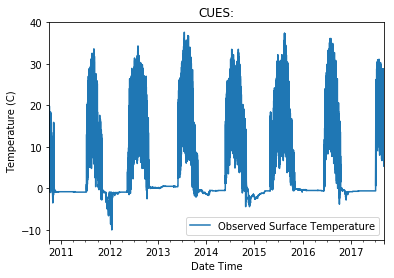

In [122]:
fig,ax = plt.subplots()
#S.output.scalarSWE.plot(ax=ax, label='Modeled SWE')
cues_data.set_index('DateTime').Tground_C.plot(ax=ax,label='Observed Surface Temperature')
ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Date Time')
ax.set_title('CUES:')
ax.legend()